<a href="https://colab.research.google.com/github/Rafaelpecan/CatsAndDogs/blob/main/catsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential, Model,load_model
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import VGG16
import numpy as np
from IPython.display import Image
from keras.layers.core import Flatten, Dense, Dropout
from sklearn.utils import shuffle
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
#Montagem do drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#mapeando area de trabalho
import os

os.chdir('/content/drive/My Drive/datasets/catsandogs/test2')
!ls

In [4]:
# 0 --- cats
# 1 --- dogs
#função para carregar as imagens de treino/val
def creating_traning_data():
  #treino
  x_train = []
  y_train = []
  os.chdir('/content/drive/My Drive/datasets/catsandogs/train2')
  for img in os.listdir():  
    xtrain = load_img(img, target_size=(224,224,3))
    xtrain = img_to_array(xtrain).astype('float32')/255
    x_train.append(xtrain)
    if (img[0:3] == "cat"):
      y_train.append(0)
    if (img[0:3] == "dog"):
      y_train.append(1)

  #onehot encoding nas labels.
  le = LabelEncoder()
  y_train = le.fit_transform(y_train)
  y_train = to_categorical(y_train, 2)

  return [x_train, y_train]

In [5]:
x_train, y_train = creating_traning_data()

In [6]:
#embaralhando as imagens
x_train, y_train = shuffle(x_train, y_train)

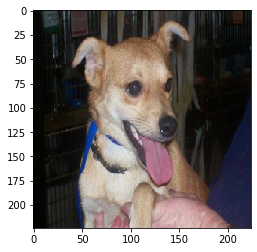

(1980, 224, 224, 3)

In [7]:
plt.imshow(x_train[4], interpolation='nearest')
plt.show()
np.shape(x_train)

In [8]:
#carregando uma VGG sem a parte dense
model= VGG16(input_shape=(224, 224, 3), weights="imagenet", include_top=False)
# congelar as camadas de convnet
for layer in model.layers:
	layer.trainable = False

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [9]:
# criando a parte densa
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(12, activation='relu')(flat1)
class2 = Dense(8, activation='relu')(class1)
output = Dense(2, activation='softmax')(class2)
# define new model
modelFinal = Model(inputs=model.inputs, outputs=output)

In [10]:
modelFinal.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#inicializando o data generator
aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [13]:
#h = modelFinal.fit(x=aug.flow(x_train, y_train, batch_size=10), steps_per_epoch=len(x_train)/10, epochs=30)

h = modelFinal.fit(x_train, y_train, batch_size=10 , epochs=5)

Epoch 1/5
198/198 [==============================] - 1012s 5s/step - loss: 0.5326 - accuracy: 0.7960
Epoch 2/5
198/198 [==============================] - 1004s 5s/step - loss: 0.3123 - accuracy: 0.9020
Epoch 3/5
198/198 [==============================] - 1005s 5s/step - loss: 0.1385 - accuracy: 0.9495
Epoch 4/5
198/198 [==============================] - 1006s 5s/step - loss: 0.0734 - accuracy: 0.9763
Epoch 5/5
198/198 [==============================] - 1011s 5s/step - loss: 0.0276 - accuracy: 0.9934


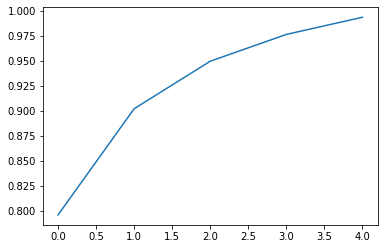

In [15]:
plt.plot(h.history['accuracy'])


In [16]:
os.chdir('/content/drive/My Drive/datasets/catsandogs')
modelFinal.save('modelV1.h5')